# **Machine Learning in Python: Performing Principal Component Analysis (PCA)**

Chanin Nantasenamat

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, we will be performing Principal Component Analysis (PCA) using the Iris data set as an example.

---

## **1. Iris data set**

### Load library

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

### Load dataset

In [2]:
iris = datasets.load_iris()

### Input features

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Output features

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### Assigning Input (X) and Output (Y) variables
Let's assign the 4 input variables to X and the output variable (class label) to Y

In [5]:
X = iris.data
Y = iris.target

### Let's examine the data dimension

In [6]:
X.shape

(150, 4)

In [7]:
Y.shape

(150,)

---

## **2. PCA analysis**

### 2.1. Load library

In [8]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

### 2.2. Data scaling

In [9]:
X = scale(X)

### 2.3. Perform PCA analysis

Here we define the number of PC to use as 3

In [10]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)


PCA(n_components=3)

#### 2.4. Compute and retrieve the **scores** values

In [11]:
scores = pca.transform(X)

In [12]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [13]:
Y_label = []

for i in Y:
  if i == 0:
    Y_label.append('Setosa')
  elif i == 1:
    Y_label.append('Versicolor')
  else:
    Y_label.append('Virginica')

Species = pd.DataFrame(Y_label, columns=['Species'])

In [14]:
df_scores = pd.concat([scores_df, Species], axis=1)

In [15]:
df_scores

,PC1,PC2,PC3,Species
0,-2.264703,0.480027,-0.127706,Setosa
1,-2.080961,-0.674134,-0.234609,Setosa
2,-2.364229,-0.341908,0.044201,Setosa
3,-2.299384,-0.597395,0.091290,Setosa
4,-2.389842,0.646835,0.015738,Setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,Virginica
146,1.564580,-0.896687,-0.026371,Virginica
147,1.521170,0.269069,0.180178,Virginica
148,1.372788,1.011254,0.933395,Virginica


#### 2.5. Retrieve the **loadings** values

In [16]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=iris.feature_names)
df_loadings

,PC1,PC2,PC3
sepal length (cm),0.521066,0.377418,-0.719566
sepal width (cm),-0.269347,0.923296,0.244382
petal length (cm),0.580413,0.024492,0.142126
petal width (cm),0.564857,0.066942,0.634273


#### 2.6. **Explained variance** for each PC

In [17]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922])

## **3. Scree Plot**

### 3.1. Import library

In [18]:
import numpy as np
import plotly.express as px

### 3.2. Preparing explained variance and cumulative variance

#### 3.2.1. Preparing the explained variance data

In [19]:
explained_variance

array([0.72962445, 0.22850762, 0.03668922])

In [20]:
explained_variance = np.insert(explained_variance, 0, 0)

#### 3.2.2. Preparing the cumulative variance data

In [21]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

#### 3.2.3. Combining the dataframe

In [22]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [23]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.729624,0.730
2,PC2,0.228508,0.959
3,PC3,0.036689,0.996


#### 3.2.4. Making the scree plot

##### 3.2.4.1. Explained Variance

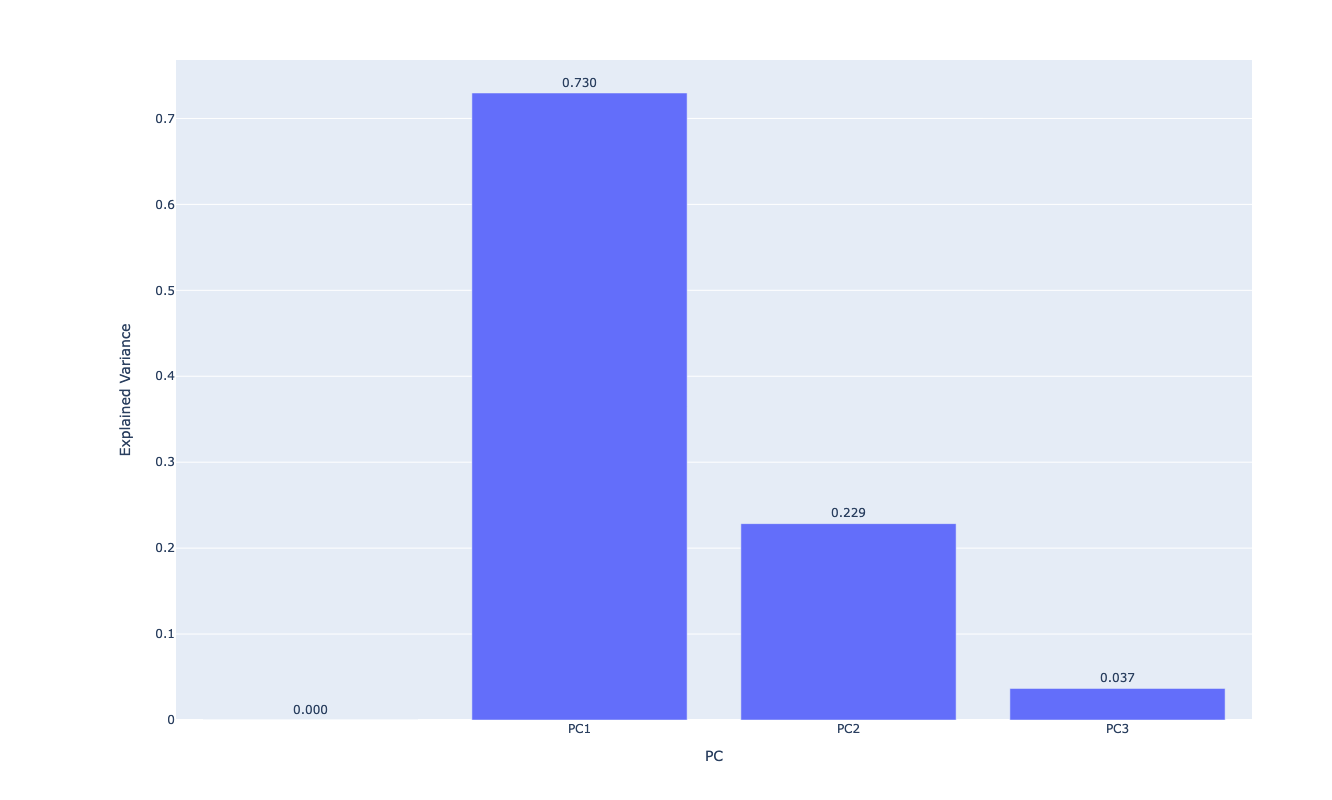

In [32]:
# https://plotly.com/python/bar-charts/

fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             height=800, width=600)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

##### 3.2.4.2. Explained Variance + Cumulative Variance

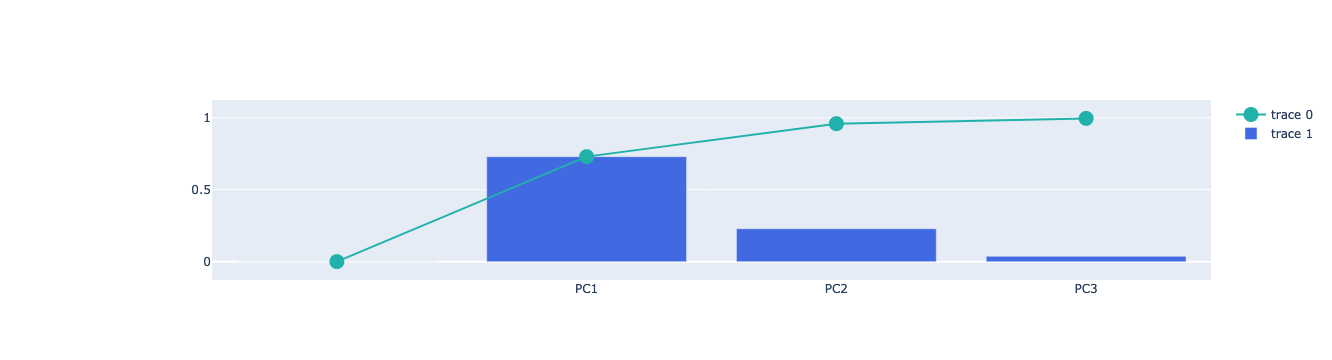

In [38]:
# https://plotly.com/python/creating-and-updating-figures/

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

##### 3.2.4.3. Explained Variance + Cumulative Variance (Separate Plot)

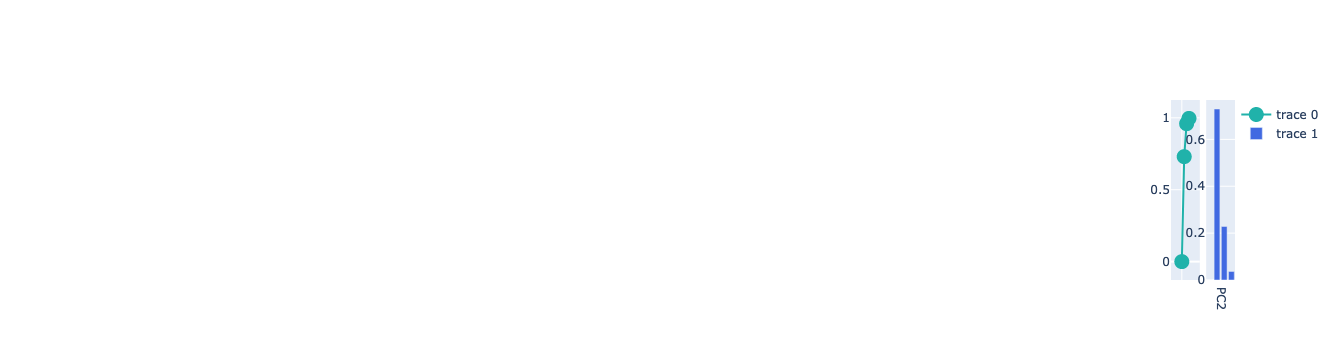

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ), row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2
    )


fig.show()

## **4. Scores Plot**

Source: https://plotly.com/python/3d-scatter-plots/

# 4.1. Load library
[API Documentation](https://plotly.com/python-api-reference/plotly.express.html) for *plotly.express* package

In [27]:
import plotly.express as px

### 4.2. Basic 3D Scatter Plot

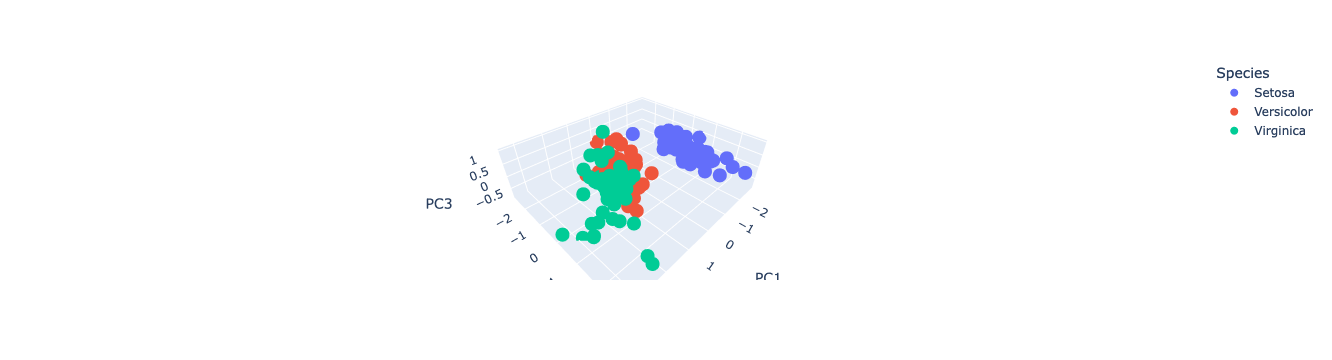

In [28]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
              color='Species')

fig.show()

### 4.3. Customized 3D Scatter Plot

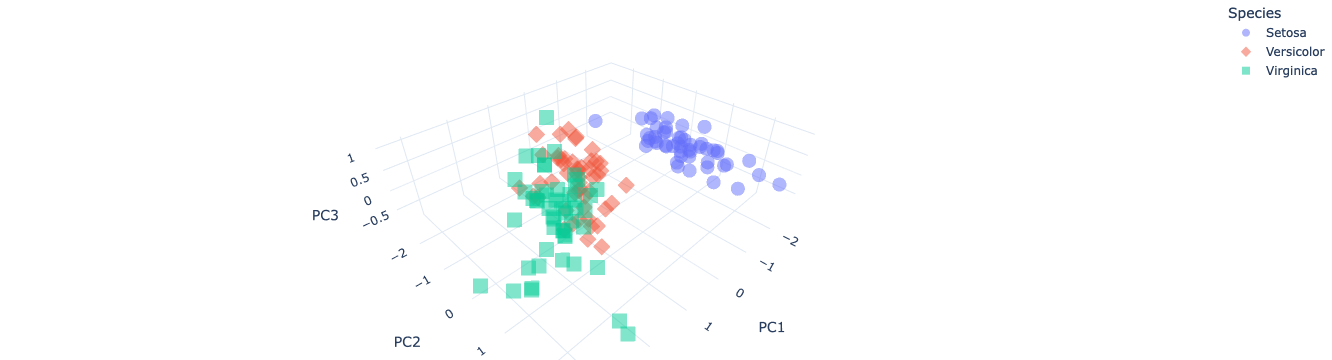

In [29]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
              color='Species',
              symbol='Species',
              opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# https://plotly.com/python/templates/
fig.update_layout(template='plotly_white') # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"

## **5. Loadings Plot**

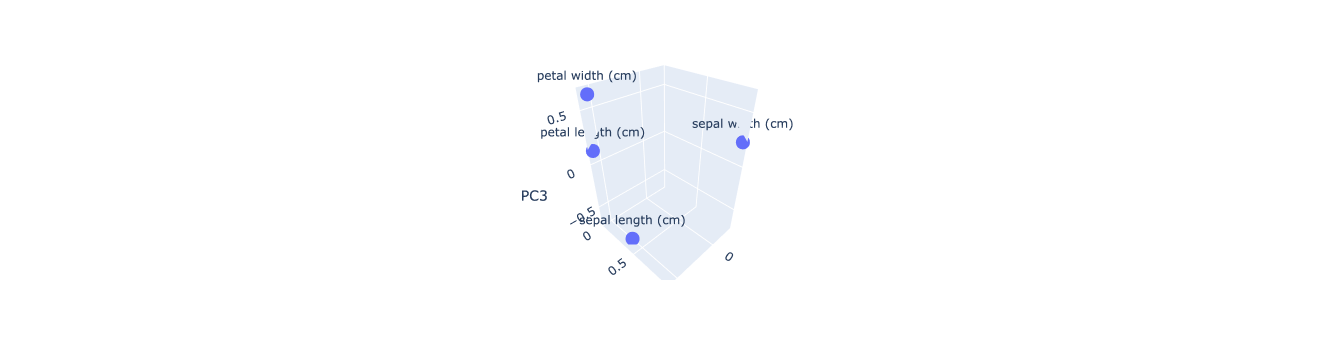

In [30]:
loadings_label = df_loadings.index
# loadings_label = df_loadings.index.str.strip(' (cm)')

fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                    text = loadings_label)

fig.show()